### Problem Statement :
	
	A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years. 


### Project Objective :

	The objective of this project is to find out patterns and insight from the data provided that can help different stores to improve in various fields, and to build predictive model to predict sales for given number of months.


### Data Description :

	We have been provided with a csv file with 6435 rows and 8 features/columns. The features provided in the data are as follows.

* `Store` : This column has the different store numbers stored which can be used to identify different stores.
* `Date` : Date of the Week on which the data was recorded
* `Weekly_Sales` : A cumulative figure of sales in dollar of a particular week.
* `Holiday_Flag` : This column describes if the given week was a holiday week or not.
* `Temperature` : Average temperature of the city in the week.
* `Fuel_Price` : Average Fuel price in the week.
* `CPI` : The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time.
* `Unemployment` : This is the sum of the unemployed who are willing to work and are actively looking for a job and the unemployed who are willing to work and are not actively looking for a job. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Walmart.csv')
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

`Statistics of all the numeric columns in the row only the column weekly_sales columns values are very large as compared to the other column values `

In [2]:
print('Range of the Weekly_Sales Column')
int(data.Weekly_Sales.max()) - int(data.Weekly_Sales.min())

Range of the Weekly_Sales Column


3608700

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


`There are no null values present in the DataFrame Date is in object format which we will convert in dateformat`

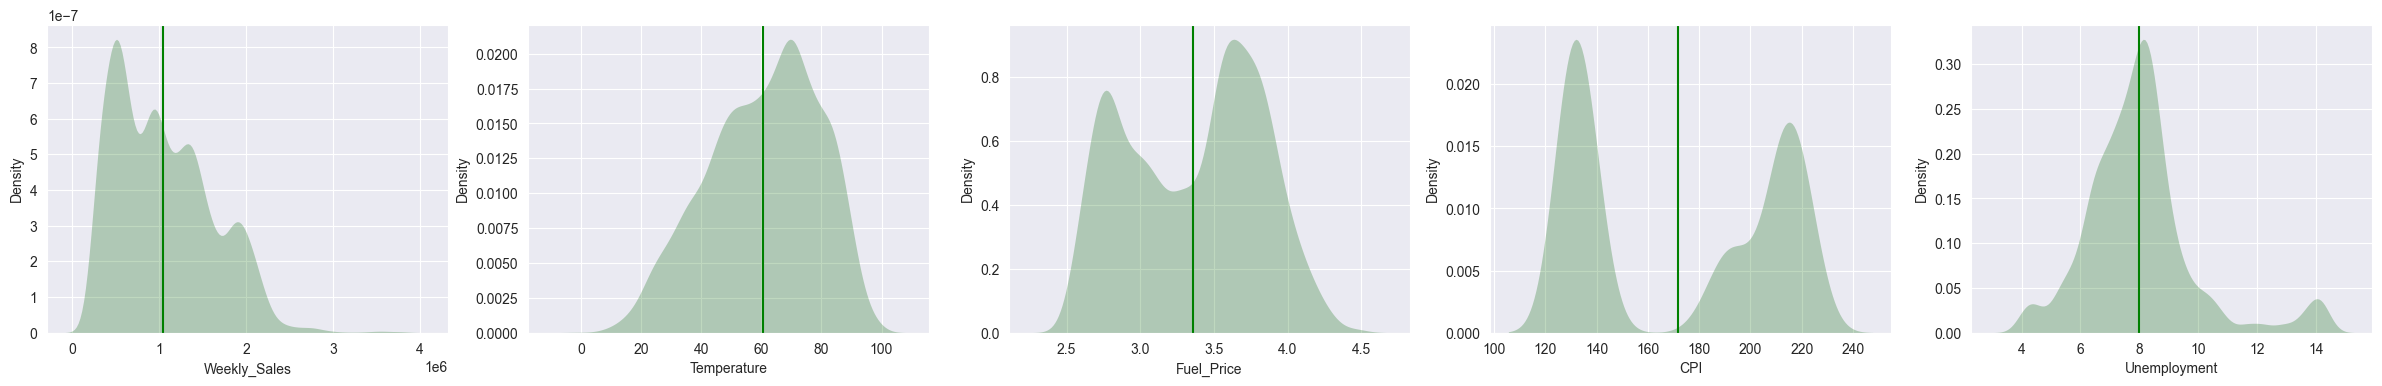

In [4]:
column = data.columns
column = column.delete(0)
column = column.delete(0)
column = column.delete(1)
sns.set_style('darkgrid')
plt.subplots(1,5,figsize = (30,4))
for index,col in enumerate(column):
    plt.subplot(1,5,index+1)
    sns.kdeplot(data[col],fill=True,linewidth = 0,color = 'darkgreen')
    plt.axvline(data[col].mean(),color = 'green')

In [5]:
for index,col in enumerate(column):
    print(f"The skewness of {col} is : {data[col].skew()}")

The skewness of Weekly_Sales is : 0.6683617974864524
The skewness of Temperature is : -0.3367676011075799
The skewness of Fuel_Price is : -0.09615830011865549
The skewness of CPI is : 0.06349184988549494
The skewness of Unemployment is : 1.1881439334843265


`There are outliers in Temperature and Unemployment columns rest of the columns do not have any outliers present in them We can see this clearly in the box plot there are multiple ways of dealing with the outliers depending on the further exploration we will decide which method to use`

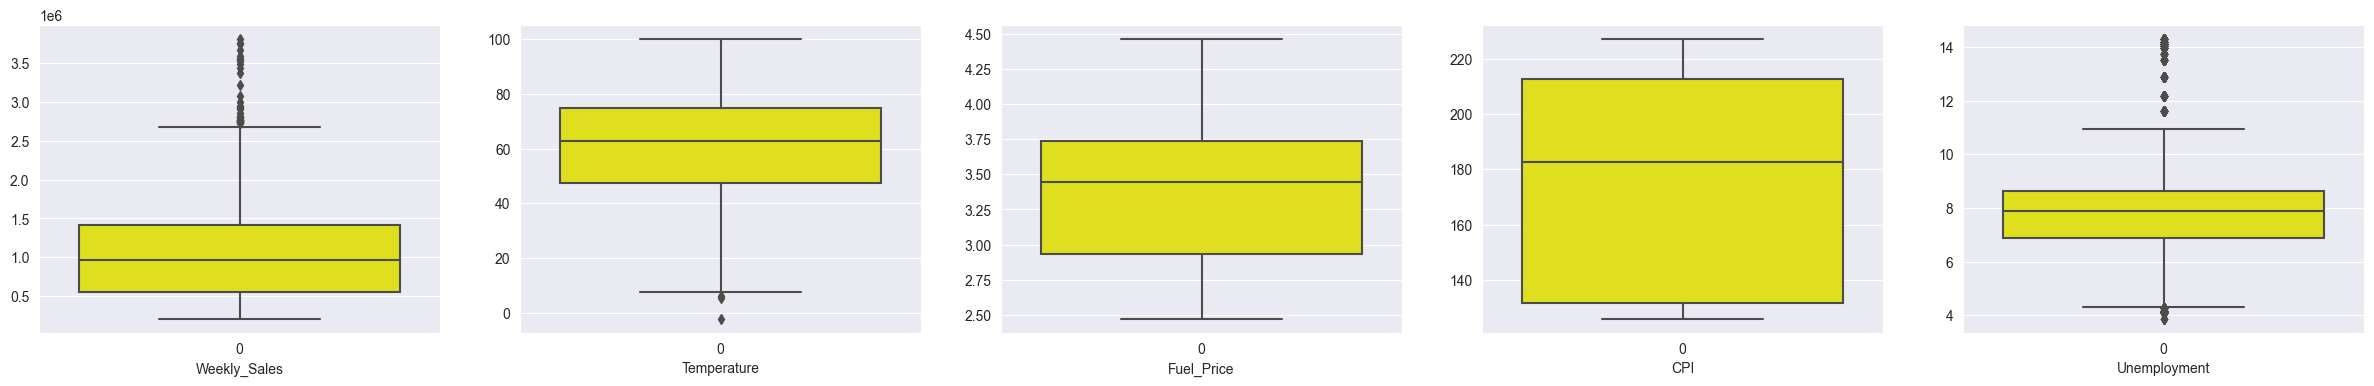

In [6]:
plt.subplots(1,5,figsize = (30,4))
for index,cols in enumerate(column):
    plt.subplot(1,5,index+1)
    sns.boxplot(data[cols],color='yellow')
    plt.xlabel(cols)

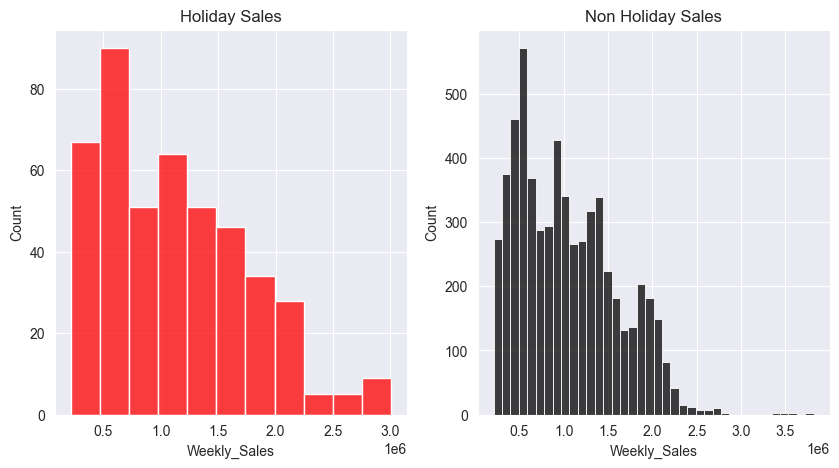

In [7]:
holiday_sales = data.loc[(data.Holiday_Flag == 1)]['Weekly_Sales']
non_holiday_sales = data.loc[(data.Holiday_Flag == 0)]['Weekly_Sales']

plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(holiday_sales,color = 'red')
plt.title('Holiday Sales')
plt.subplot(1,2,2)
sns.histplot(non_holiday_sales,color = 'black')
plt.title('Non Holiday Sales')
plt.show()

`From the above distribution plot we can understand that there are less holiday week as compared to non-holiday weeks in the data and the distribution of sales is not much different, even in holidays the total amount of sales is nearly around 0.5x1e^6 in maximum number of weeks, the max amount of sale in holidays is around 3.0x1e^6 and in non-holidays week is around 3.5x1e^6`

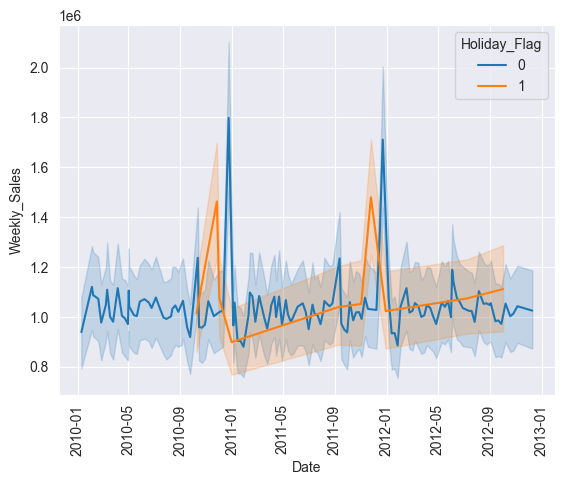

In [8]:
data['Date'] = data['Date'].astype('datetime64[ns]')
sns.lineplot(x = data['Date'],y = data['Weekly_Sales'],hue = data['Holiday_Flag'])
plt.xticks(rotation = 90)
plt.show()

`From the above graph we can state that the amount of sales is higher near the holiday season and apart from it the sales remian in a certain range but this seasonality is only upto begining of the 2012 we cannot see any such seasonality/pattern for the year 2013 this implies that the data was not collected for the holiday week in the end of year 2012 the max sate that is present in the dataset is ` 

In [9]:
data.Date.max()

Timestamp('2012-12-10 00:00:00')

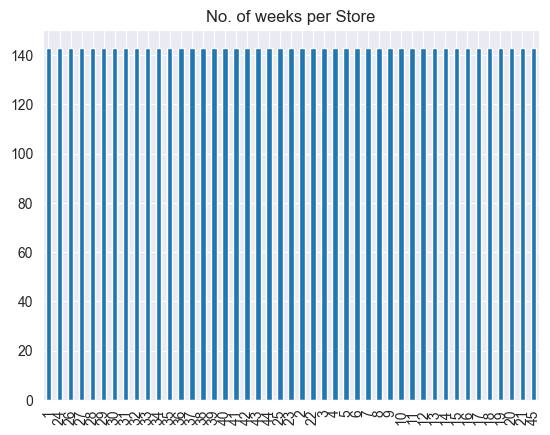

In [10]:
data.Store.value_counts().plot(kind = 'bar')
plt.title('No. of weeks per Store')
plt.show()

`In total we have data for 45 different stores, and for each store we have data of just 143 weeks which is around 2 years and three quarters of data`

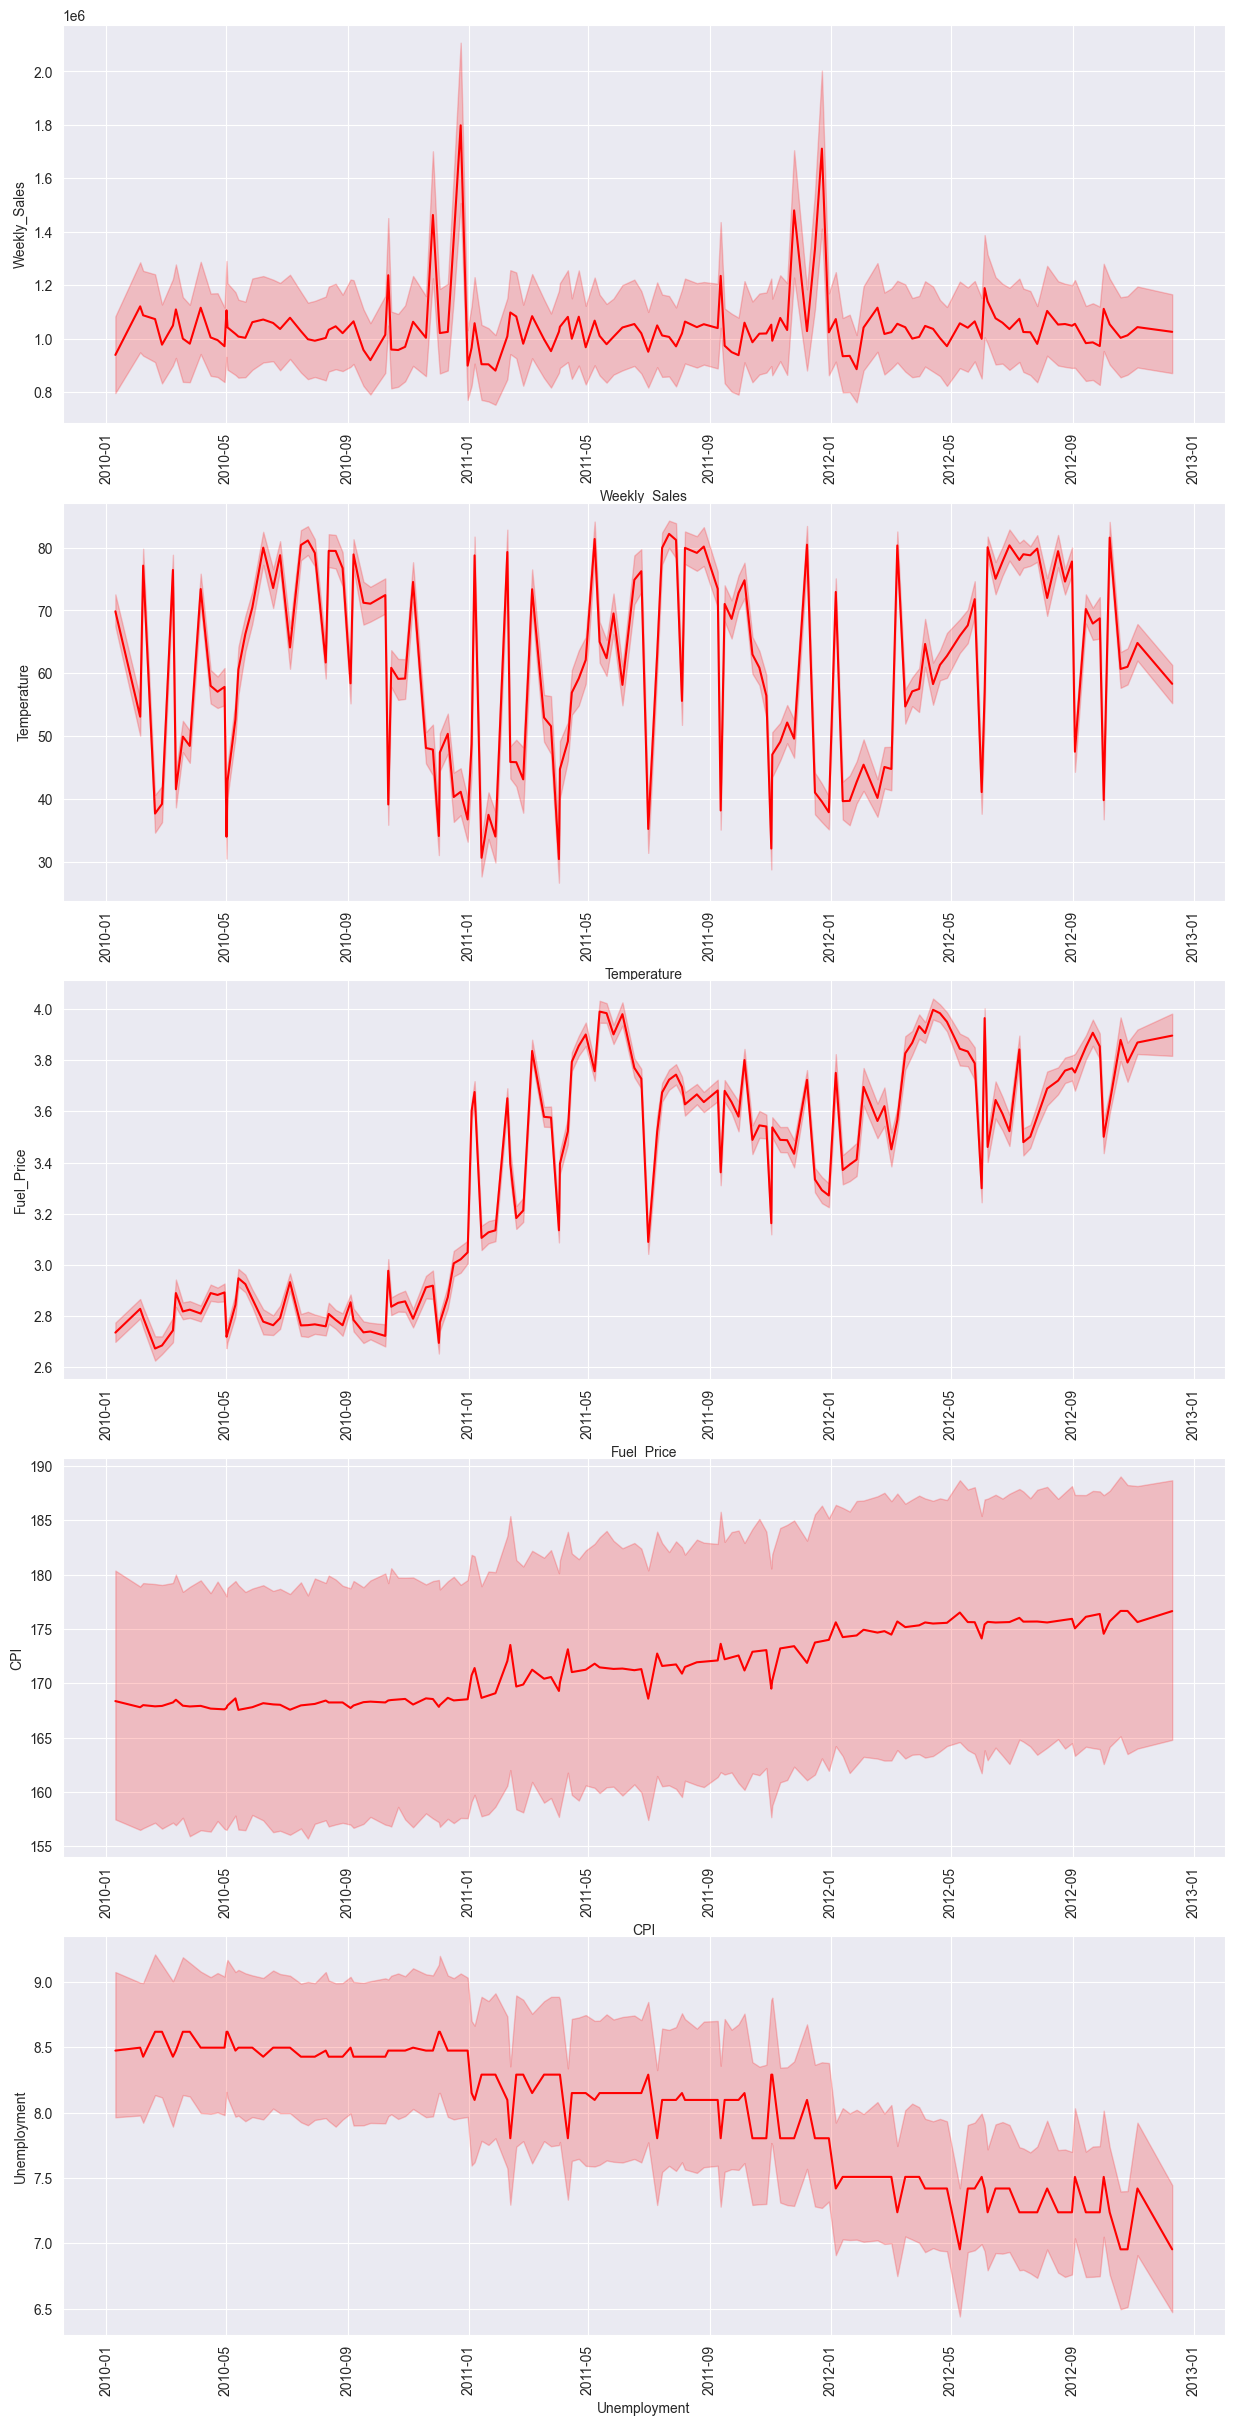

In [11]:
plt.subplots(5,1,figsize = (15,30))
for index,cols in enumerate(column):
    plt.subplot(5,1,index+1)
    sns.lineplot(y = data[cols],x=data['Date'],color='red')
    plt.xlabel(cols)
    plt.xticks(rotation = 90)

- From above plots it is clear that all the different variables in this data are time series data that are recorded against a function of time t and we cannot see any kind of trend in the Weekly Sales, Temperature they are constant around a certain range, the temperature's range is very less as compared to Weekly sales and does not define any causability with the weekly sales,
- Variables, CPI and fuel price do show a positive trend where they increase with the time but also fuel price keeps on decreasing and increasing around a constant range again not providing any causability for Weekly Sales,
- same is with CPI, though it can be seen that as CPI is increasing fule price is also increasing beacuse of the positive trend that they follow, CPI is a varibale that is used to measure inflation and that inflation may be the cause of increase in fuel price but we cannot see from this data that there is any effect of CPI on weekly sales.
- Unemployment rate follows a negative trend and is decreasing with the time.

`Plot of all the Stores Weekly Sales`

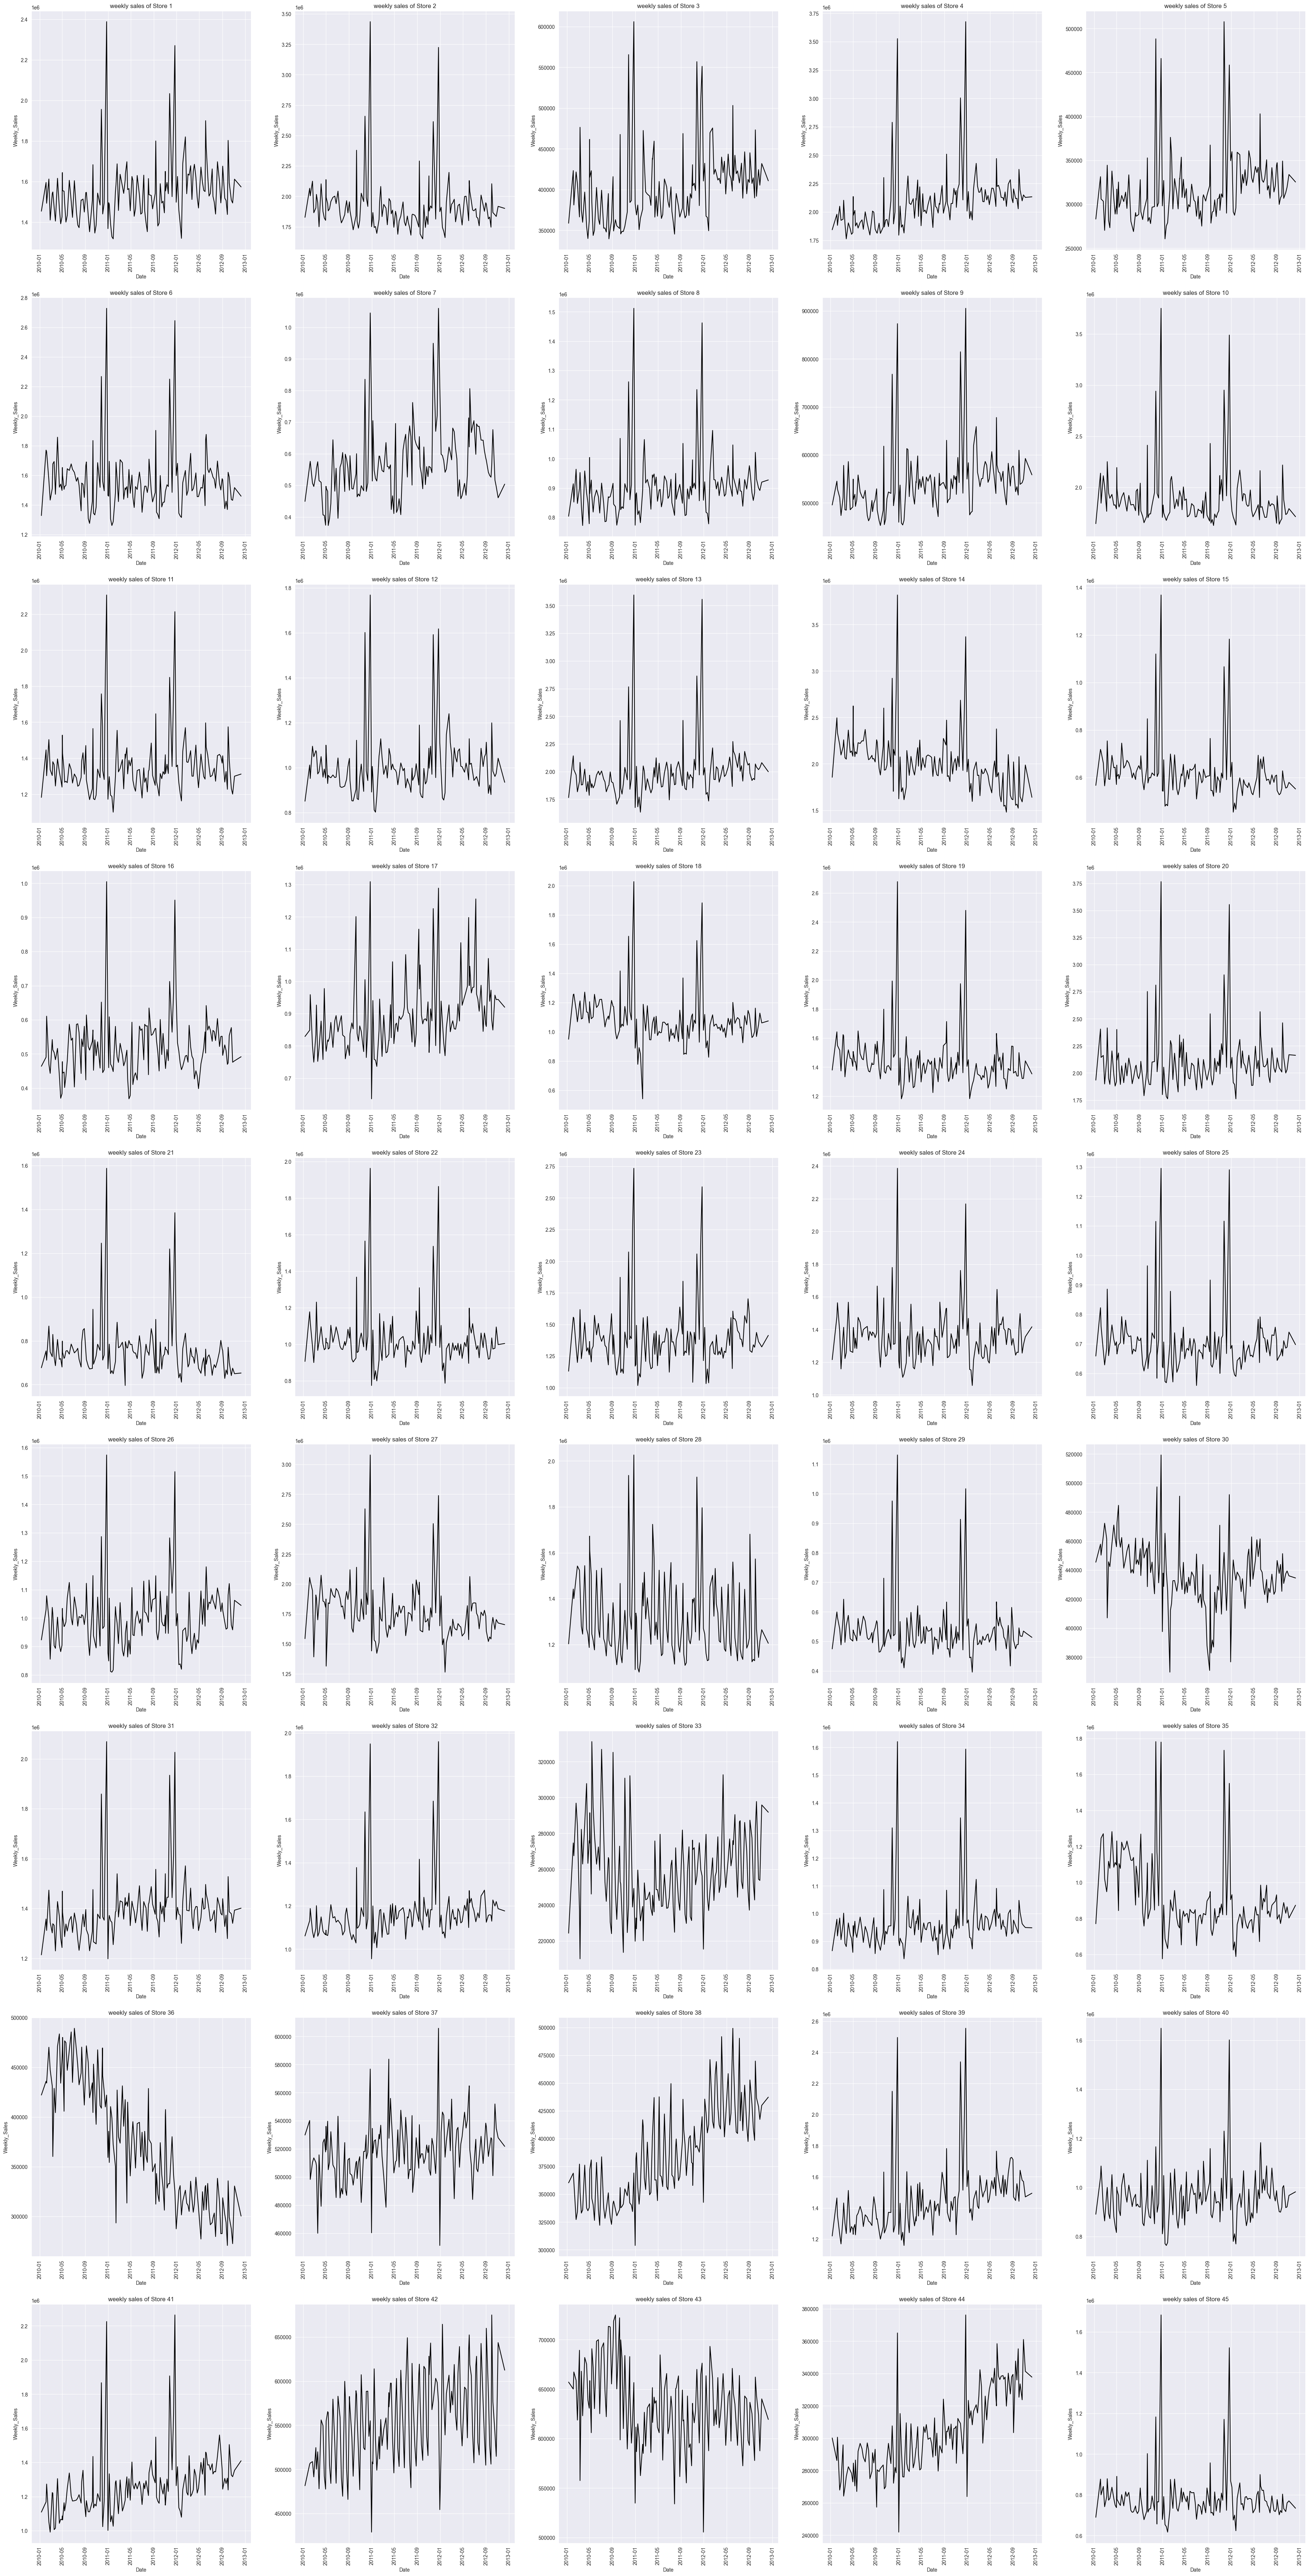

In [12]:
plt.subplots(9,5,figsize = (45,90))
for store in range(1,46):
    plt.subplot(9,5,store)
    sns.lineplot(x = data.loc[data.Store == store]['Date'],y = data.loc[data.Store == store]['Weekly_Sales'],color = 'black')
    plt.xticks(rotation = 90)
    plt.title(f'weekly sales of Store {store}')

From the above plot it is clear that among all the stores, store no. 4 is performing the best with the highest sale and a positive trend , there are many stores that are following the same trend but there are many other stores that are following a negative trend for example store no. 36 the weekly amount of sales is decreasing with time, we don't have further data for the stores like the region they are in, population of the region, poverty index of the region, analysis on which can make things much more clear.

- let us plot the different variables along with time for store 36 and store 4 if we can see some difference in the variables for these stores.

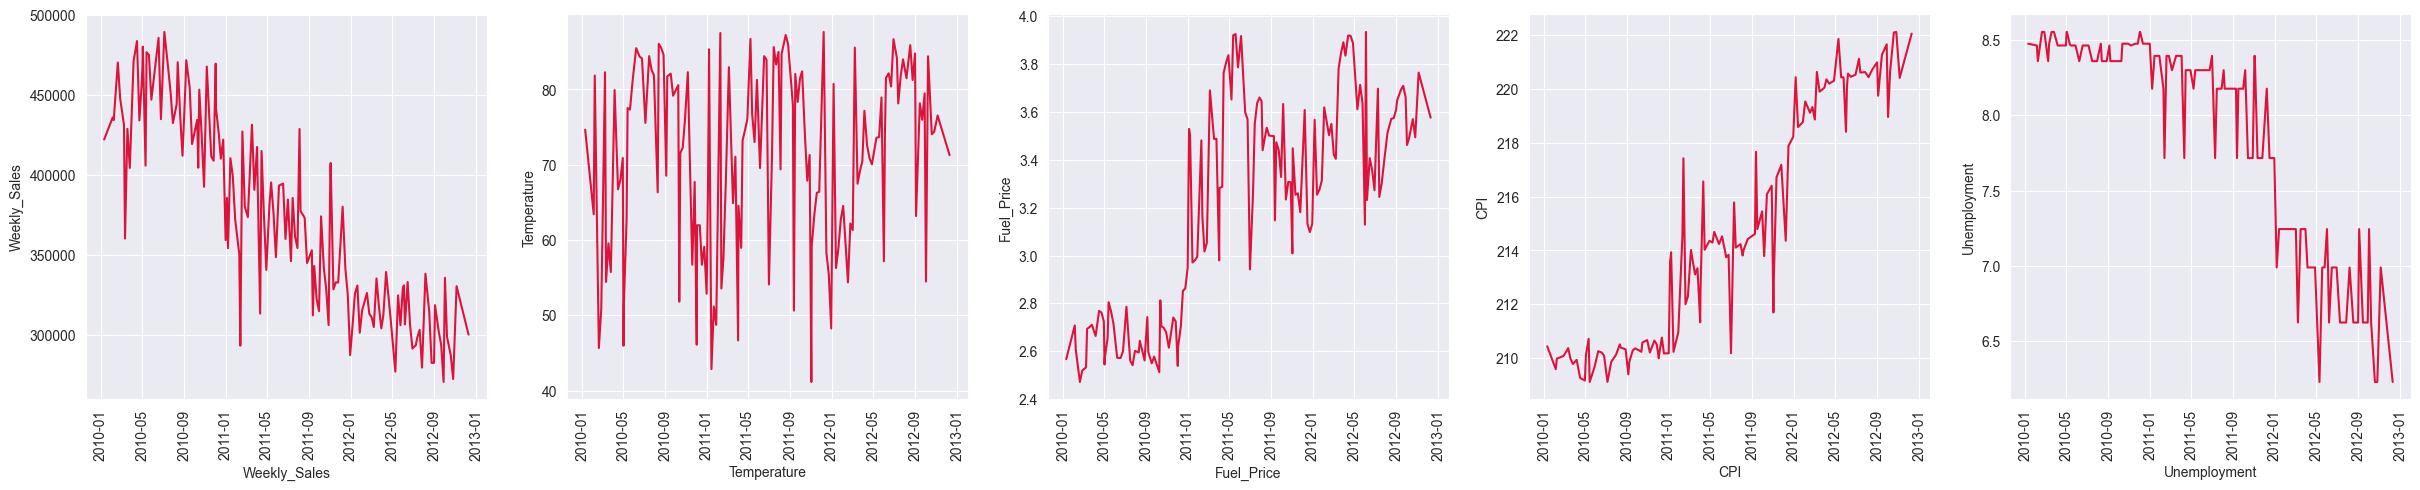

In [13]:
plt.subplots(1,5,figsize = (30,5))
for index,cols in enumerate(column):
    plt.subplot(1,5,index+1)
    sns.lineplot(x = data.loc[data.Store == 36]['Date'],y = data.loc[data.Store == 36][cols],color = 'crimson')
    plt.xlabel(cols)
    plt.xticks(rotation = 90)

The above plot is for Store 36

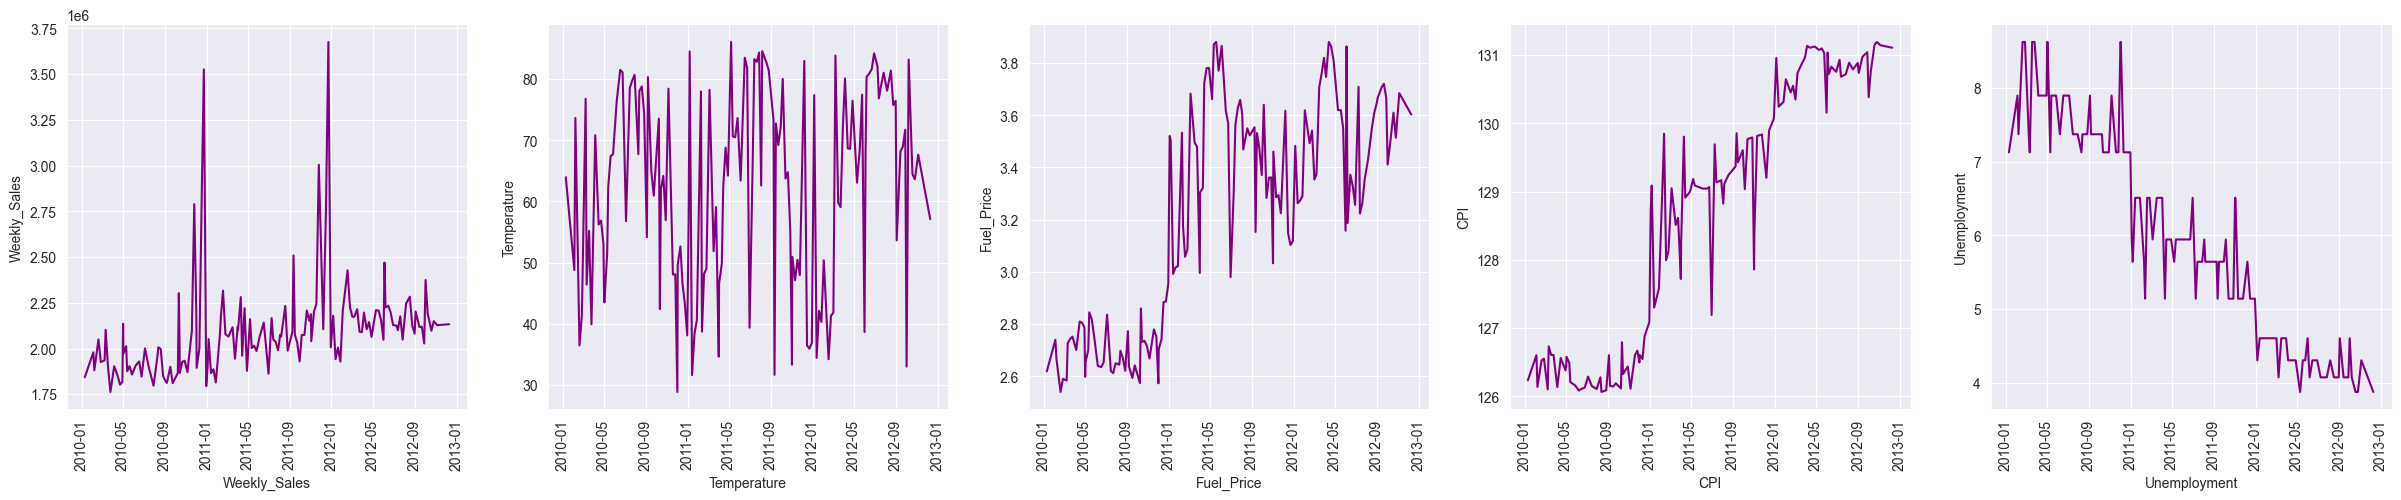

In [14]:
plt.subplots(1,5,figsize = (30,5))
for index,cols in enumerate(column):
    plt.subplot(1,5,index+1)
    sns.lineplot(x = data.loc[data.Store == 4]['Date'],y = data.loc[data.Store == 4][cols],color = 'purple')
    plt.xlabel(cols)
    plt.xticks(rotation = 90)

The above plot is for store 4

`Above two plots clearly state the difference in performance of best and worst performing stores but the other variables are similar to each other and they do not differ from each other for different stores`

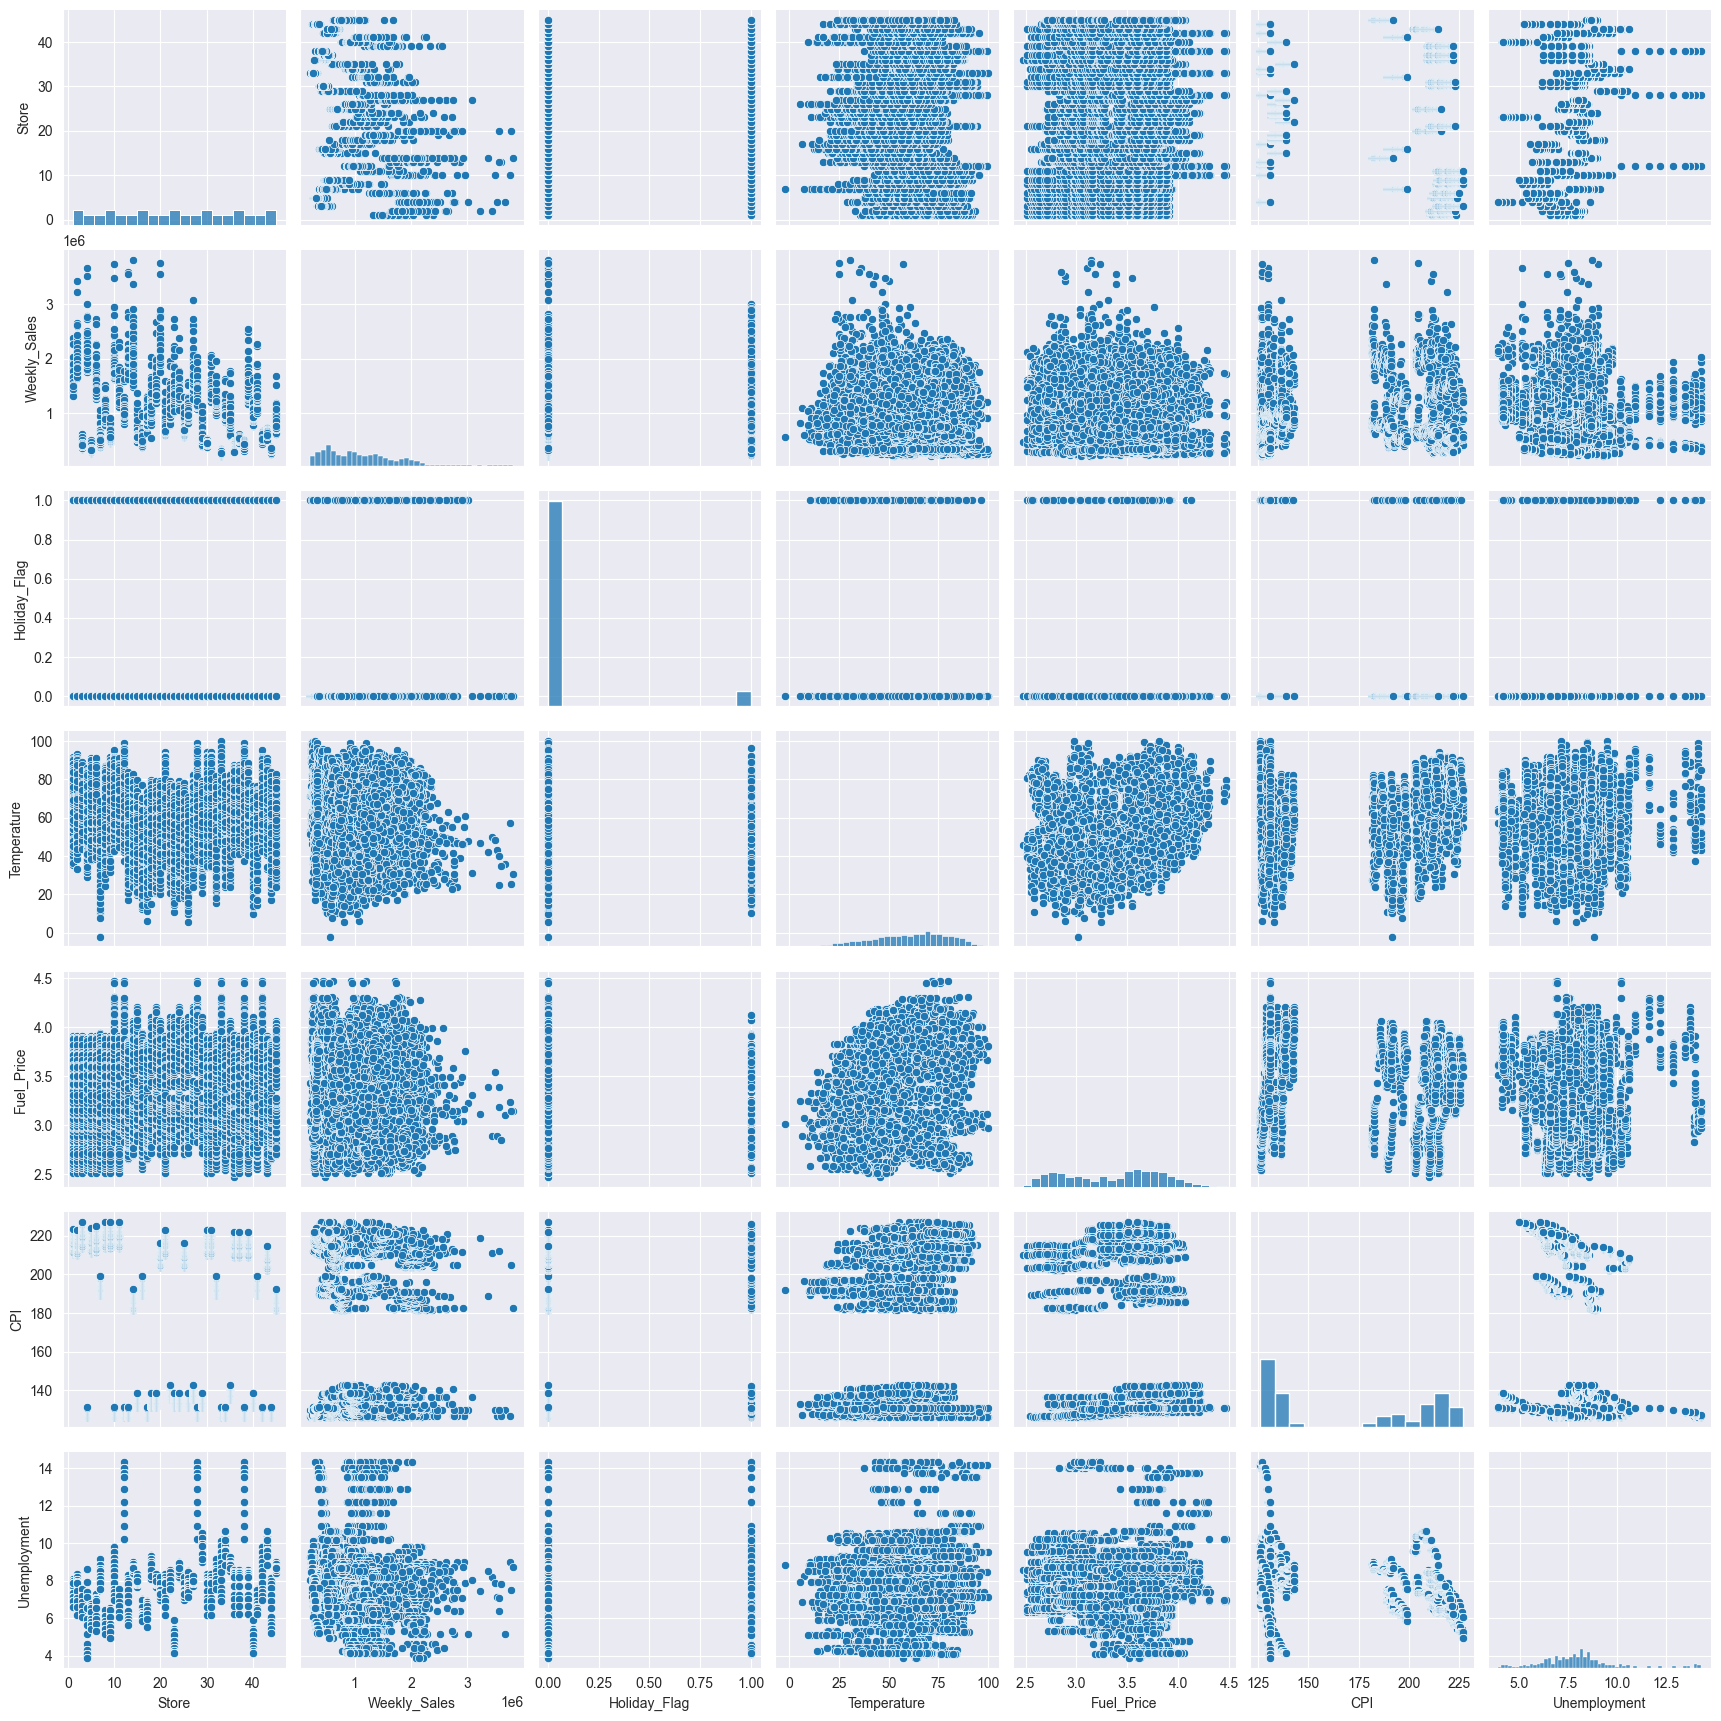

In [15]:
sns.pairplot(data)
plt.show()

`The pairplot doesnot show any kind of strong correlation between two different variables`

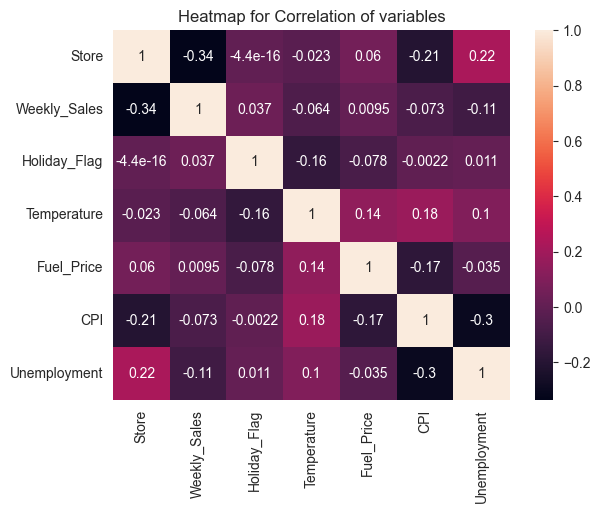

In [16]:
sns.heatmap(data.corr(numeric_only=True),annot = True)
plt.title("Heatmap for Correlation of variables")
plt.show()

`None of the variables are strongly correlated to each other there is some correlation in these variables but they are very week so we cannot use the other variables to forecast the weekly sales using some regression problem as there is no pattern for the model to capture. Hence we will be using time series analysis for this problem we can use auto ARIMA , auto SARIMA or LSTM model for this problem`

### Data Pre-processing Steps and Inspiration

In [17]:
#data.set_index('Date',inplace=True)
for i in range(1,46):
    globals()[f"Store_{i}"] = data.loc[(data['Store'] == i)]['Weekly_Sales']

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose

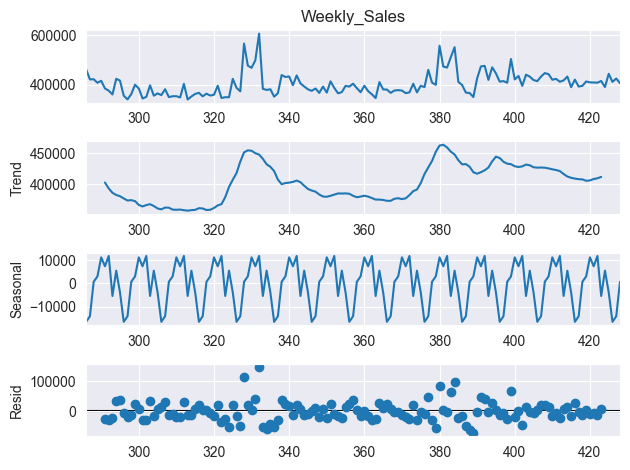

In [19]:

dec_r=seasonal_decompose(Store_3,model='addidtive',period=10)
dec_r.plot()
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

for i in range(1,46):
    pval = adfuller(globals()[f"Store_{i}"])[1]
#   print(f"Pvalue according to adfuller test for Store_{i} is : ",pval)
    if pval > 0.05:
        print(f"Store_{i} Accepting Null Hypothesis: Time Series is not stationary")
    else:
        pass
#        print(f"Store_{i} Rejecting Null Hypothesis: Time Series is stationary")

Store_14 Accepting Null Hypothesis: Time Series is not stationary
Store_30 Accepting Null Hypothesis: Time Series is not stationary
Store_36 Accepting Null Hypothesis: Time Series is not stationary
Store_38 Accepting Null Hypothesis: Time Series is not stationary
Store_42 Accepting Null Hypothesis: Time Series is not stationary
Store_43 Accepting Null Hypothesis: Time Series is not stationary
Store_44 Accepting Null Hypothesis: Time Series is not stationary


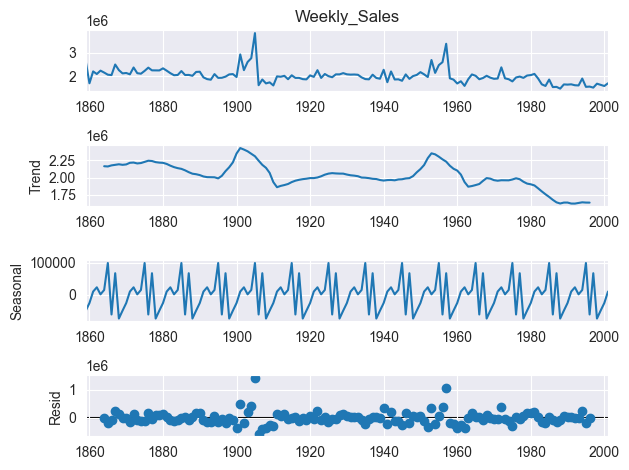

In [22]:
dec_r=seasonal_decompose(Store_14,model='addidtive',period=10)
dec_r.plot()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf()